# EDA

1. 전체적인 데이터 분석
- 분석의 목적과 목적에 맞는 변수가 무엇인지
- 데이터형 확인/데이터의 오류나 누락이 없는지
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지 -> 아니라면 그 이유가 무엇인지 확인

2. 데이터의 개별 속성값 관찰
- 개별 데이터를 관찰하며 전체적인 추세와 특이사항 관찰
- 적절한 요약통계 지표 사용 (평균, 중앙값, 분산 등)
- 시각화를 통해 데이터의 개별 속성에 어떤 통계 지표가 적절한지 결정

3. 속성 간의 관계 분석
- 개별 속성 관찰에서 찾아내지 못했던 속성들의 조합, 패턴 발견
- 그래프를 통해 시각화하여 속성 간의 관계 분석
- 상관계수를 통한 상관관계 확인

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/train.csv').drop(columns=['ID'])
train_X = train.drop(columns=['y'])
train_y = train['y']

## 1. 전체적인 데이터 분석

In [19]:
print('데이터 정보')
train.info()

print('기본 통계량')
train.describe()

데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     3071 non-null   float64
 1   x_1     3071 non-null   float64
 2   x_2     3071 non-null   float64
 3   x_3     3071 non-null   float64
 4   x_4     3071 non-null   float64
 5   x_5     3071 non-null   float64
 6   x_6     3071 non-null   float64
 7   x_7     3071 non-null   float64
 8   x_8     3071 non-null   float64
 9   x_9     3071 non-null   float64
 10  x_10    3071 non-null   float64
 11  y       3071 non-null   float64
dtypes: float64(12)
memory usage: 288.0 KB
기본 통계량


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
count,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000,3071.000000
mean,1.017317,-1.905214,1.225166,0.914665,-0.289170,-1.757312,0.476580,-0.130860,0.611456,0.333042,0.063043,85.123235
std,0.037673,0.252696,0.025536,0.023245,0.047931,0.049477,0.014907,0.022913,0.018972,0.024105,0.024849,2.843672
min,0.909712,-2.291299,1.059260,0.859154,-0.581258,-1.808343,0.464028,-0.164303,0.576179,0.299315,-0.060792,16.677906
25%,0.991460,-2.099075,1.220908,0.897469,-0.300683,-1.793896,0.469064,-0.149459,0.594802,0.313767,0.052659,83.599627
50%,1.021709,-1.968968,1.231369,0.916536,-0.270608,-1.775107,0.472015,-0.136668,0.613295,0.327590,0.071555,84.777734
75%,1.045692,-1.755181,1.240851,0.932047,-0.258906,-1.735302,0.476017,-0.116344,0.628313,0.347686,0.081348,86.169745
max,1.089651,-0.994155,1.252734,0.964006,-0.245976,-1.545138,0.579150,-0.056130,0.644183,0.428381,0.088754,91.959034


In [20]:
print('결측치 확인')
train.isnull().sum()

print('데이터 형식')
train.dtypes

결측치 확인
데이터 형식


x_0     float64
x_1     float64
x_2     float64
x_3     float64
x_4     float64
x_5     float64
x_6     float64
x_7     float64
x_8     float64
x_9     float64
x_10    float64
y       float64
dtype: object

## 2. 데이터 개별의 속성값 관찰

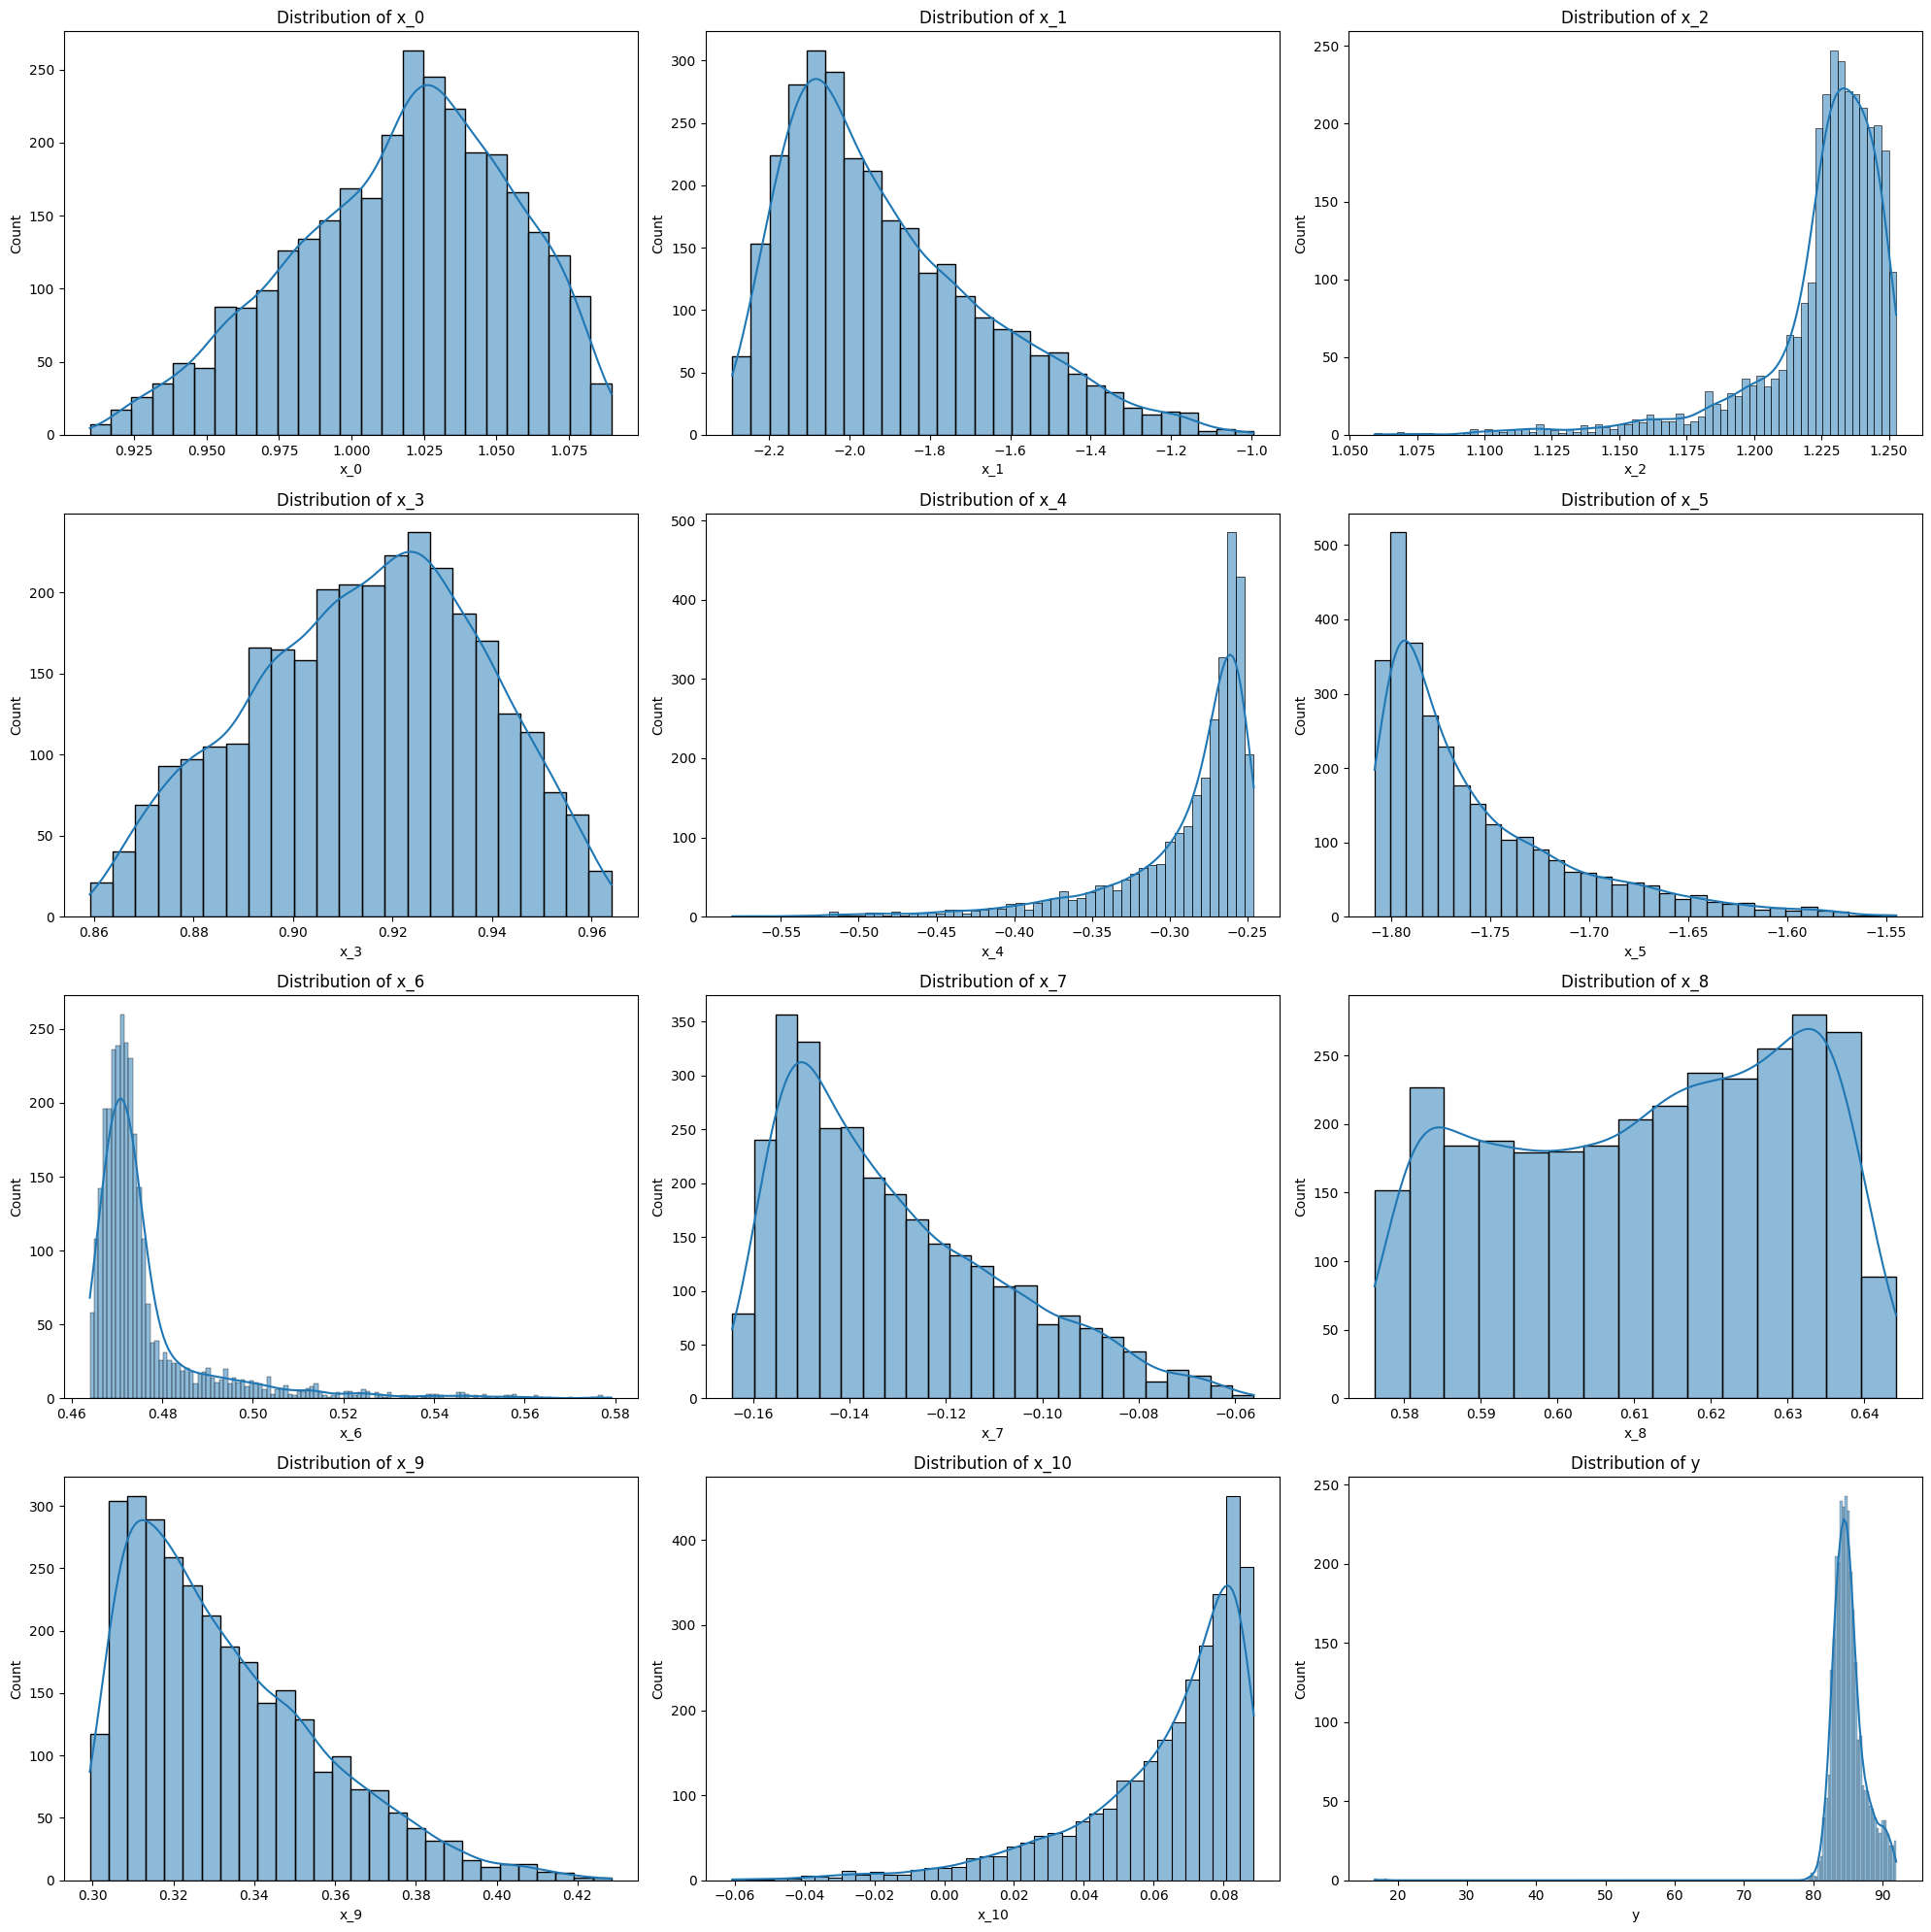

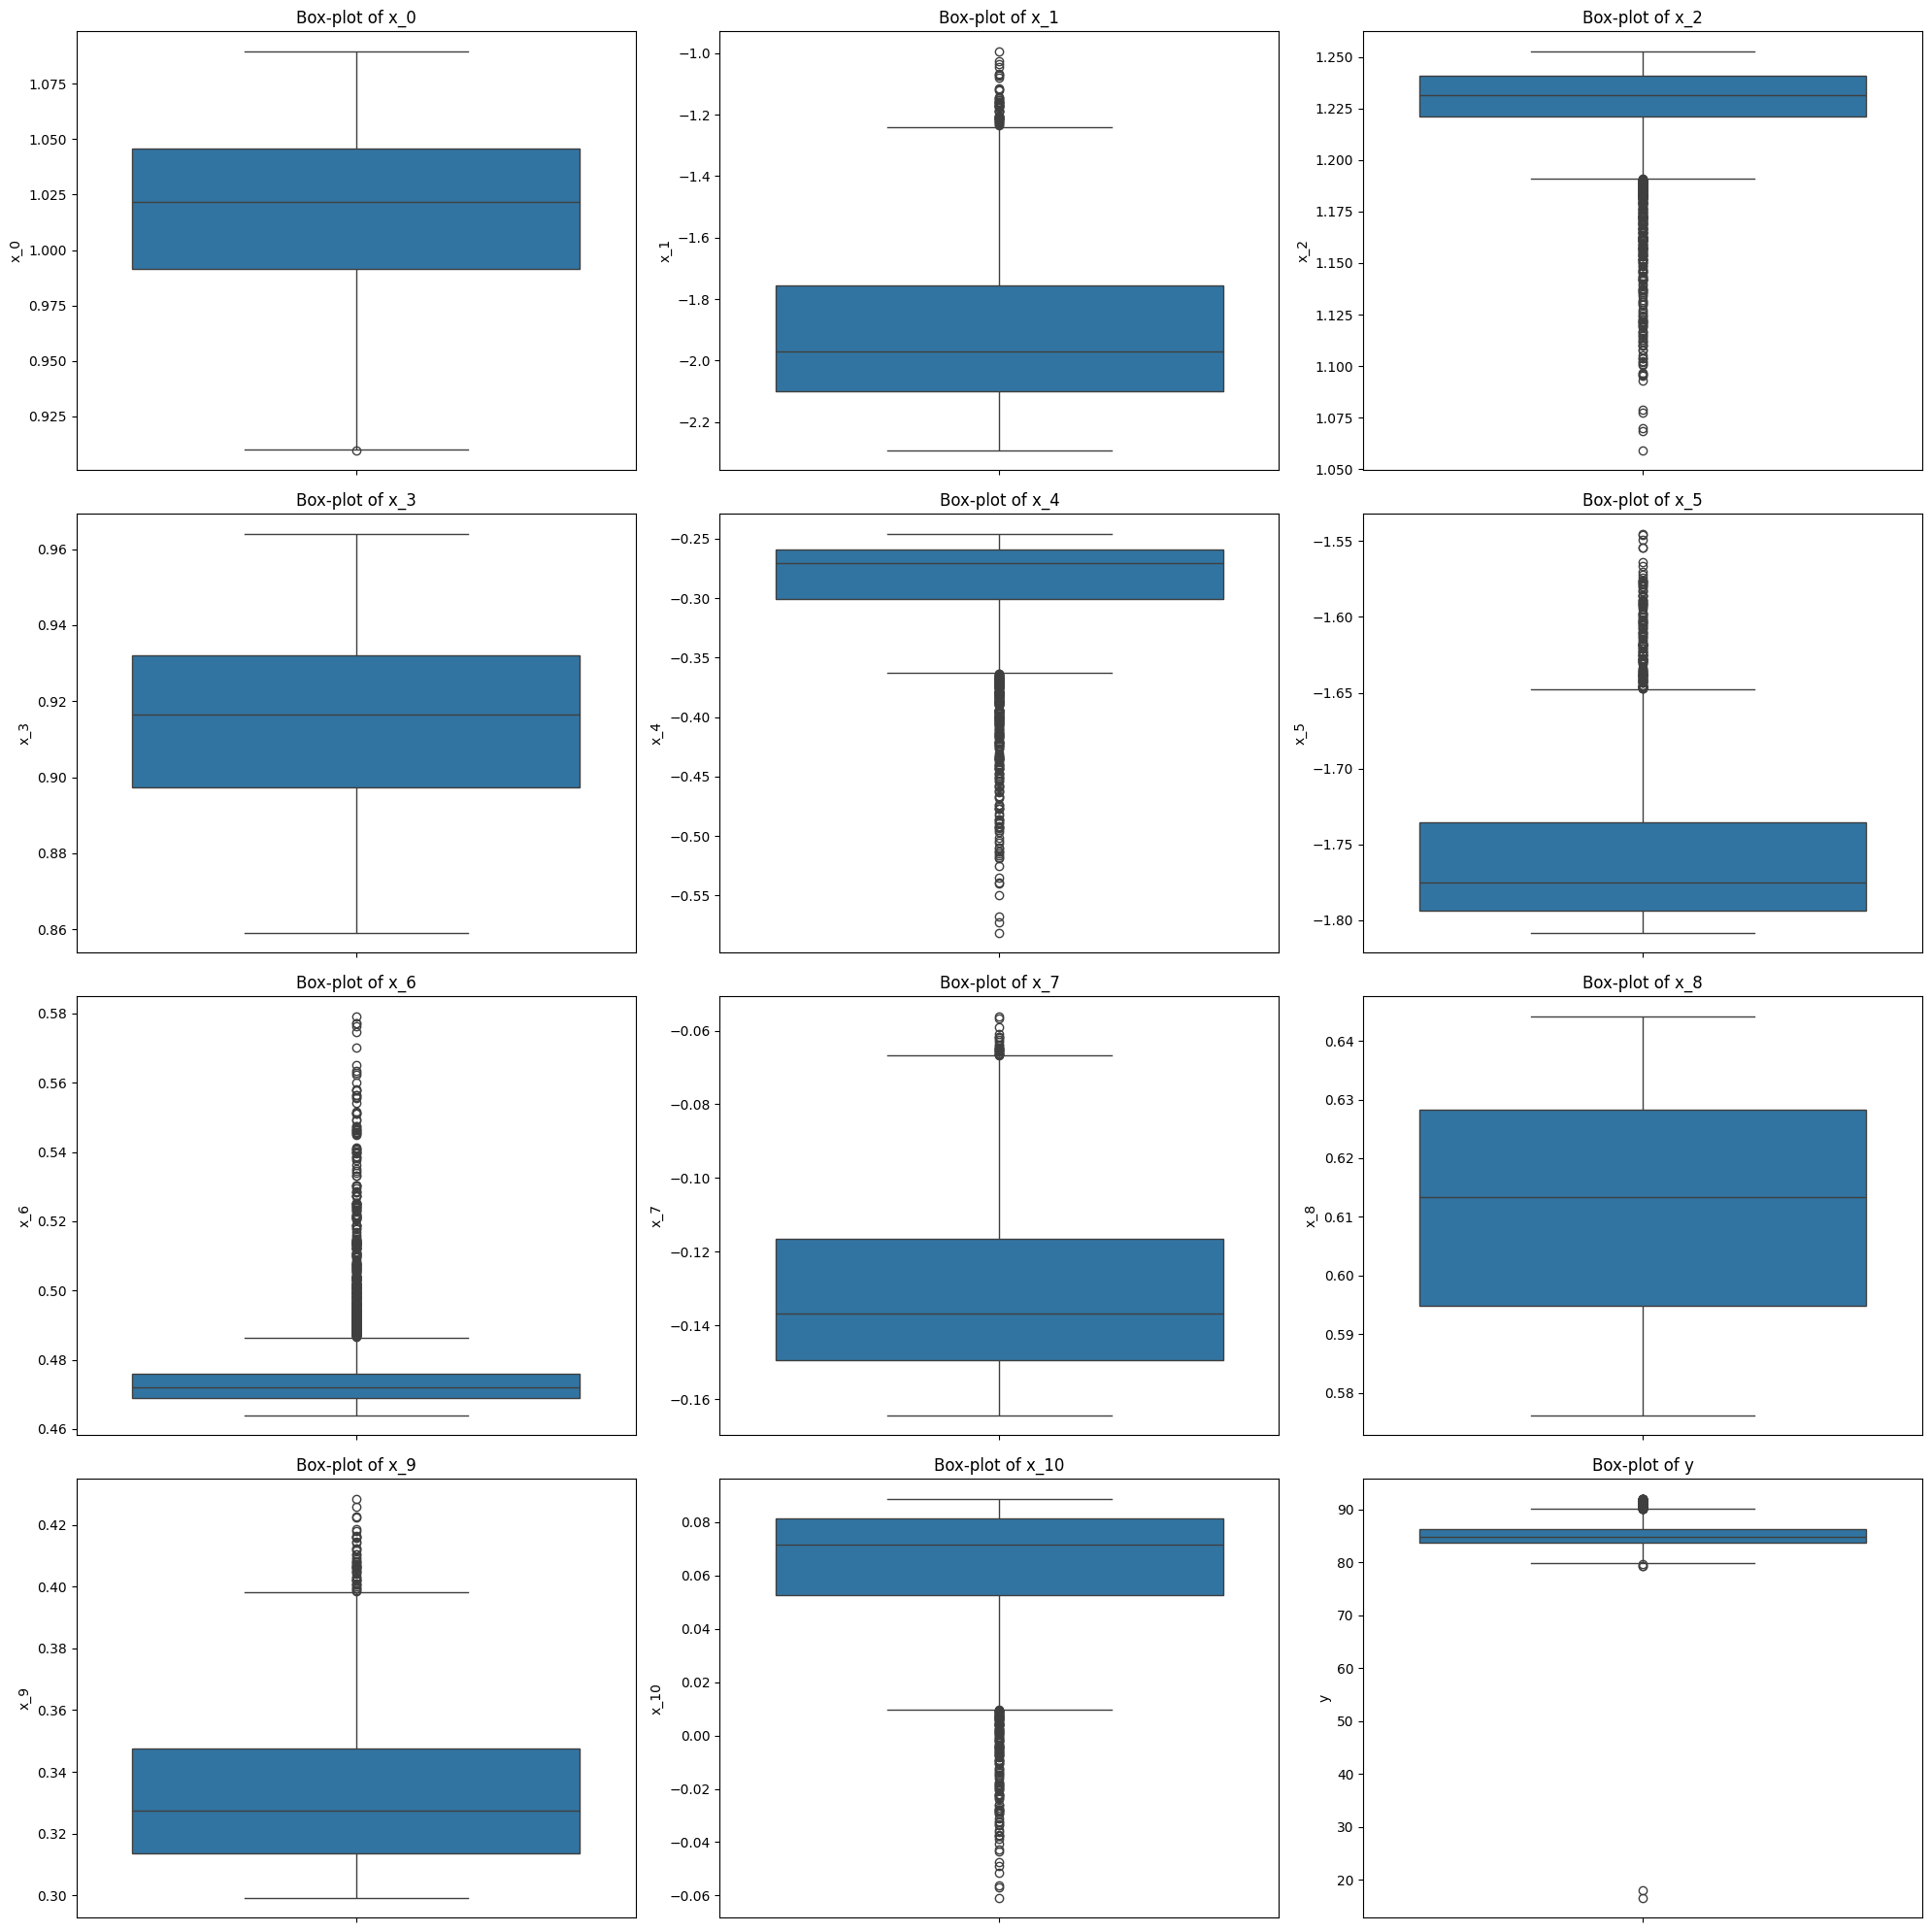

In [21]:
# create histograms for each variables
fig,axes = plt.subplots(4,3,figsize=(20,20))
axes = axes.ravel() #  Converts a two-dimensional array to a one-dimensional array

for i, col in enumerate(train):
    sns.histplot(train[col], ax= axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
  
# create box-plots for each variable
fig,axes = plt.subplots(4,3,figsize=(20,20))
axes = axes.ravel()

for i, col in enumerate(train):
    sns.boxplot(y=train[col], ax= axes[i])
    axes[i].set_title(f'Box-plot of {col}')
    
plt.tight_layout()
plt.show()

## 3. 속성 간의 관계 분석 

In [23]:
corr_matrix = train.corr()
print('X와 y의 상관 관계')
print(corr_matrix['y'].sort_values(ascending=True))



X와 y의 상관 관계
x_10   -0.584812
x_4    -0.564904
x_8    -0.552549
x_2    -0.497516
x_0    -0.490777
x_3     0.335168
x_6     0.488315
x_1     0.564123
x_7     0.582986
x_9     0.583769
x_5     0.587551
y       1.000000
Name: y, dtype: float64
